In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv(r"C:\Users\Lenovo\PycharmProjects\pythonProject\extracted_features.csv")
df.head(10)

,HR,RR,R_wave_duration,P_wave_duration,PR_interval,R_peak,P_peak,Q_peak,S_peak,diagnostic_superclass,weight,sex,age,patient_id
0,64.0,1.00,0.04,0.03,0.174,0.158807,-0.007813,0.016941,-0.127874,0,63.0,1,56.0,15709.0
1,55.0,1.03,0.09,0.03,0.202,0.089008,-0.016244,0.026600,-0.377981,0,70.0,0,19.0,13243.0
2,64.0,1.01,0.03,0.03,0.187,0.265253,-0.016053,0.084356,-0.170511,0,69.0,1,37.0,20372.0
3,74.0,1.01,0.04,0.03,0.164,0.517794,-0.038900,0.275400,-0.549273,0,82.0,0,24.0,17014.0
4,66.0,1.01,0.04,0.03,0.184,0.329121,-0.026260,0.116087,-0.173933,0,70.0,1,19.0,17448.0
5,83.0,0.99,0.04,0.03,0.146,0.194744,0.023949,0.107589,-0.318906,0,58.0,1,18.0,19005.0
6,62.0,1.00,0.04,0.03,0.189,0.250073,-0.009900,0.098096,-0.395822,0,83.0,0,54.0,16193.0
7,74.0,1.00,0.04,0.03,0.163,0.230733,-0.003122,0.043333,-0.457606,1,95.0,0,48.0,11275.0
8,61.0,0.99,0.04,0.03,0.192,0.471430,-0.029257,0.043217,-0.245525,0,70.0,0,55.0,18792.0
9,63.0,1.00,0.03,0.03,0.200,0.124453,-0.008807,0.083719,-0.208904,0,56.0,1,22.0,9456.0


<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HR                     1599 non-null   float64
 1   RR                     1599 non-null   float64
 2   R_wave_duration        1599 non-null   float64
 3   P_wave_duration        1599 non-null   float64
 4   PR_interval            1599 non-null   float64
 5   R_peak                 1599 non-null   float64
 6   P_peak                 1599 non-null   float64
 7   Q_peak                 1599 non-null   float64
 8   S_peak                 1599 non-null   float64
 9   diagnostic_superclass  1599 non-null   int64  
 10  weight                 1599 non-null   float64
 11  sex                    1599 non-null   int64  
 12  age                    1599 non-null   float64
 13  patient_id             1599 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 187.4 KB


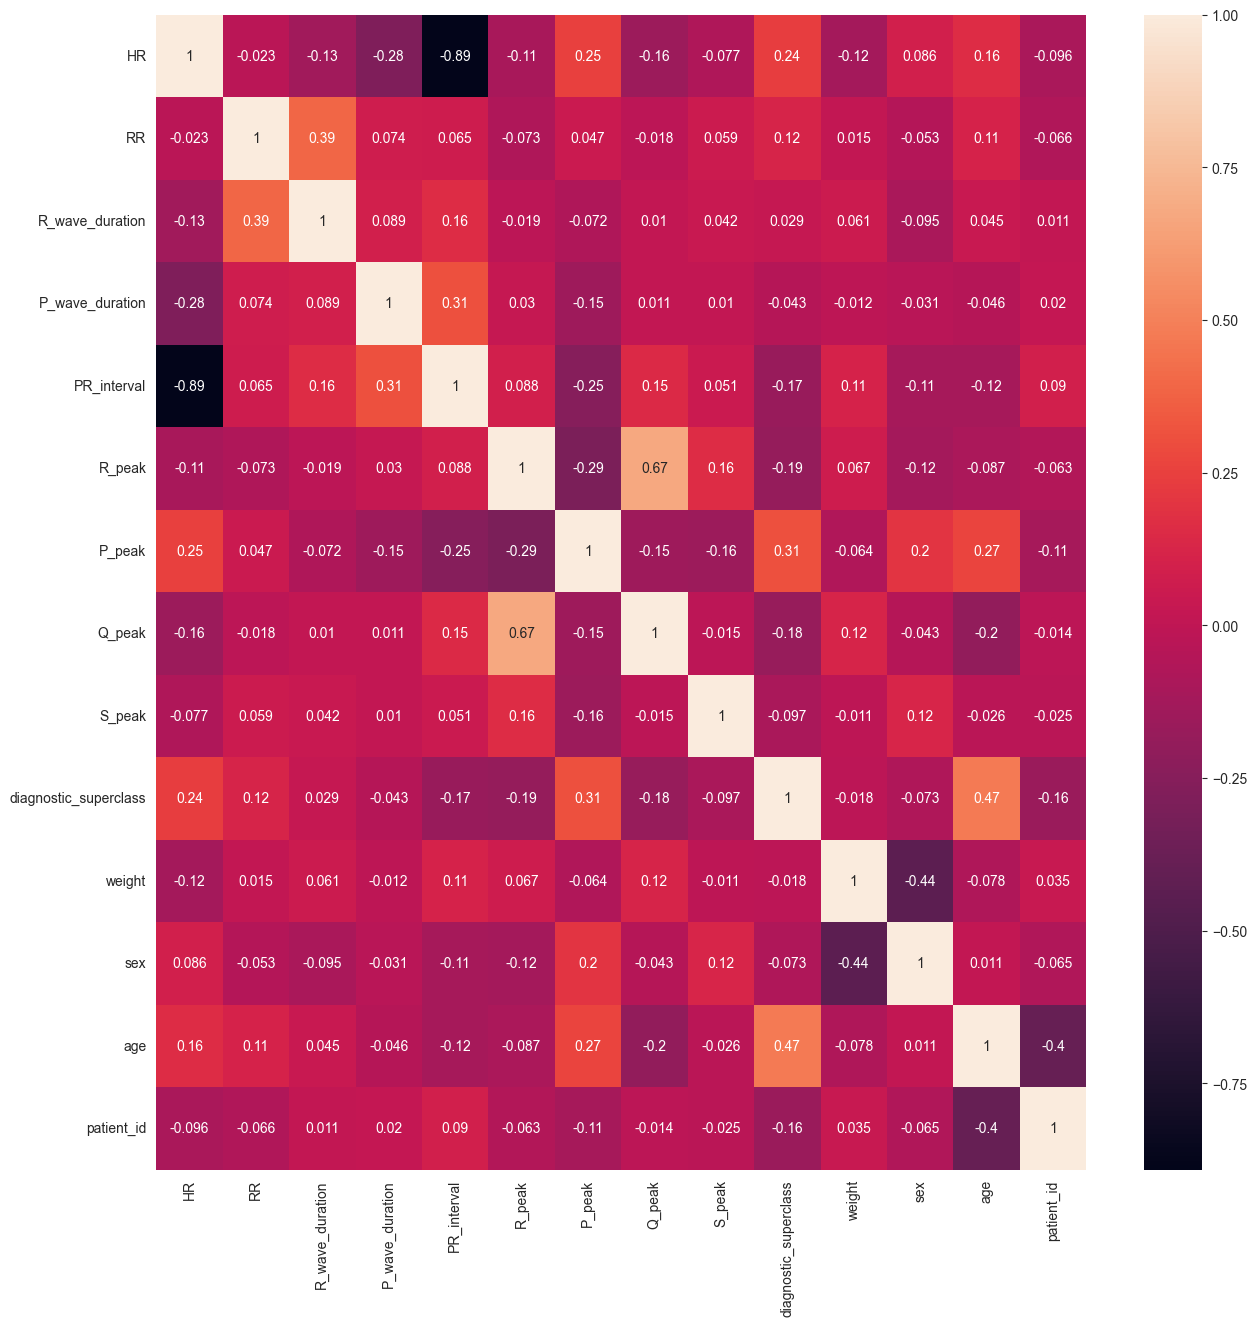

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
df.dropna(inplace=True)
df.info()

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [12]:
X=df.drop(columns='diagnostic_superclass')
y=df['diagnostic_superclass']
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=0)

svc=SVC()
scaler=MinMaxScaler()
scaled_train_X=scaler.fit_transform(train_X)
scaled_test_X=scaler.transform(test_X)

cross=cross_val_score(svc,scaled_train_X,train_y,cv=5,scoring='precision')


In [13]:
print(cross.mean())

0.7438412790920804
